## Data Exploration/Analysis

Ultimate goal is to predict median sale price per square foot of a house in the neighborhood.

Current step: EDA

Next step: PCA and Clustering. See what patterns emerge in the clusters.

Final step: predict median sale price.

## Observations:

Multifamily is listed with a 'Land Area' of 0.

Condos/apartments, no matter how tall their building, are listed with a height of 1 :/

Really need to start dropping extraneous columns, especially 'assessment' and 'appraisal' values and redundant columns.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')

In [3]:
%run jsoncleaner.py

In [4]:
#DO NOT RUN THIS TWICE IT CONTAINS A MERGE
df=df[df['Multiple Parcels Involved in Sale'] == 'No']
#Want to create a new column which is the mean sale price per square foot of a parcel in that neighborhood
df['PPS']=df['Sale Price']/df['Square Footage Improved']
df.PPS=df.PPS.replace(np.inf, np.nan)
meanpps=df.groupby('Neighborhood')['PPS'].mean().to_frame().rename(columns={'PPS':'NeighborhoodPPS'})
df=df.merge(meanpps, how='left', left_on = 'Neighborhood',right_index=True)
# Indexing by date.
df = df.set_index('Most Recent Sale Date')

C:\Users\alehe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\alehe\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


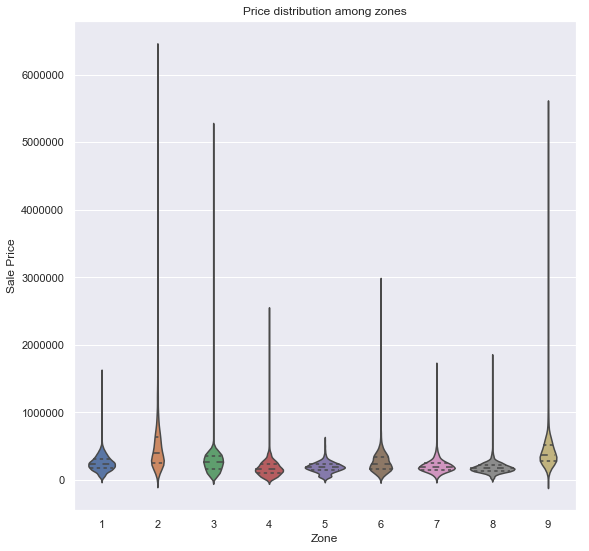

In [51]:
#Showing the price distribution among different zones, but we could use this style graph for any kind of feature.
plt.figure(figsize=(9,9))
sns.violinplot(x="Zone", y="Sale Price", data=df, inner='quartile')
plt.title("Price distribution among zones")
plt.show()
#Zone 9, the downtown, shows the highest sale prices

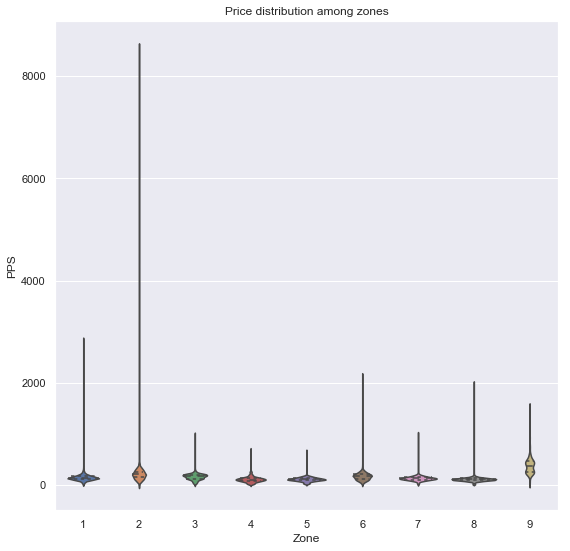

In [52]:
plt.figure(figsize=(9,9))
sns.violinplot(x="Zone", y="PPS", data=df, inner='quartile')
plt.title("Price distribution among zones")
plt.show()

In [16]:
df['Land Value Improved'].head()
#Adjacent parcels will often all have the same appraised land value. Appraised values are not generally useful for our purposes.

0    80000.0
1    80000.0
2    80000.0
3    80000.0
4    83200.0
Name: Land Value Improved, dtype: float64

In [8]:
#Need to add this to jsoncleaner.
df['Zone']=str(df['Zone'])

dtype('O')

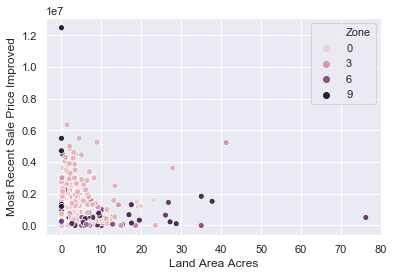

In [5]:
sns.scatterplot(y=df['Most Recent Sale Price Improved'],x=df['Land Area Acres'], hue = df['Zone'])

In [33]:
#Many neighborhoods only have 1 or 2 observations. We need to delete neighborhoods with 3 or less observations.
df['Neighborhood'].value_counts()
#.gt() = 'greater than'
s=df.Neighborhood.value_counts().gt(3)
df.loc[df.Neighborhood.isin(s[s].index)].shape
#Removes 124 observations from original dataframe.

(66779, 57)

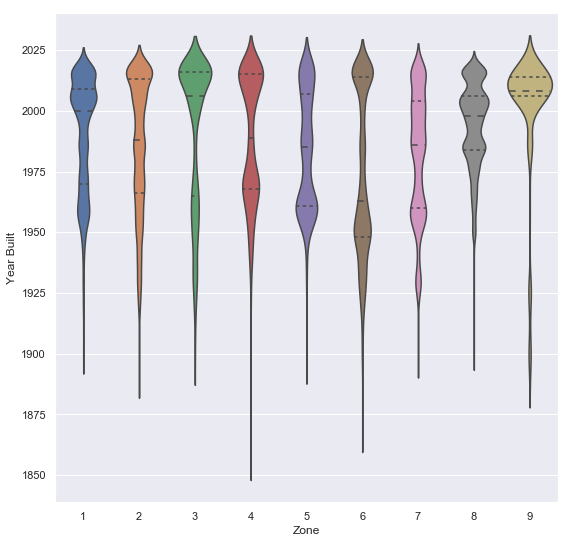

In [54]:
#ns.violinplot(df['Year Built'])
plt.figure(figsize=(9,9))
sns.violinplot(x="Zone", y="Year Built", data=df, inner='quartile')

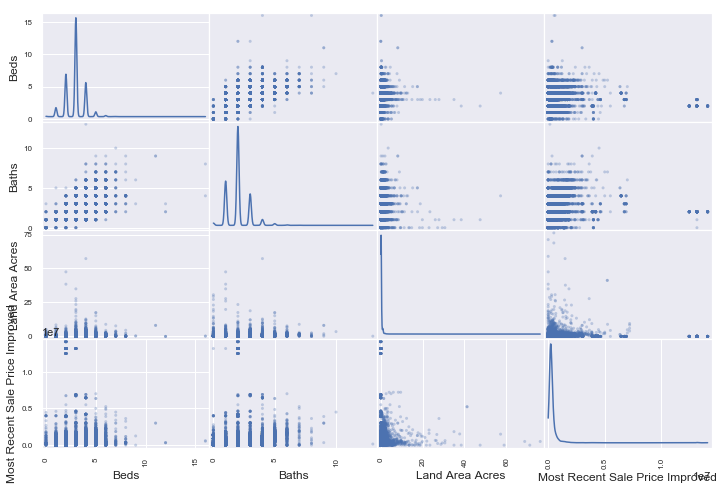

In [5]:
pd.plotting.scatter_matrix(df[['Beds','Baths', 'Land Area Acres','Most Recent Sale Price Improved']], alpha = 0.3,figsize = (12,8), diagonal = 'kde');

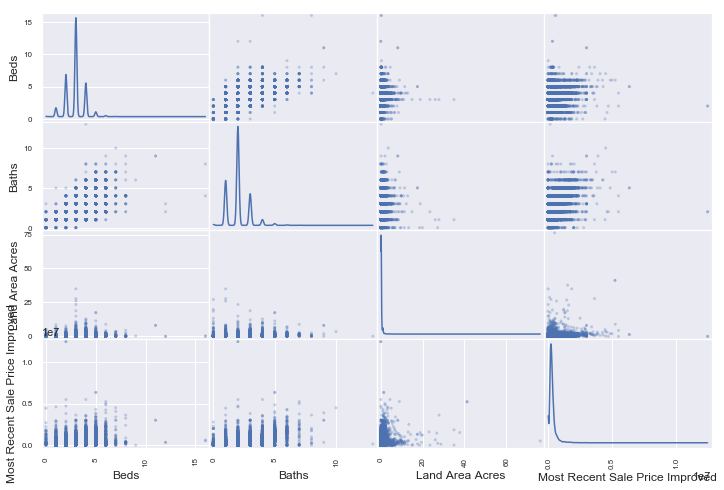

In [28]:
#Now let's take out multi-parcel sales.
df=df[df['Multiple Parcels Involved in Sale'] == "No"]
pd.plotting.scatter_matrix(df[['Beds','Baths', 'Land Area Acres','Most Recent Sale Price Improved']], alpha = 0.3,figsize = (12,8), diagonal = 'kde');

1       30617
2       23929
1.5      4346
nan      2918
1.75     2716
3        1629
1.25      440
2.5       147
2.25       87
2.75       59
4          12
Name: Story Height, dtype: int64
1.00    30617
2.00    23929
1.50     7062
3.00     1629
1.25      440
2.50      147
2.25       87
2.75       59
4.00       12
Name: Story Height Custom, dtype: int64


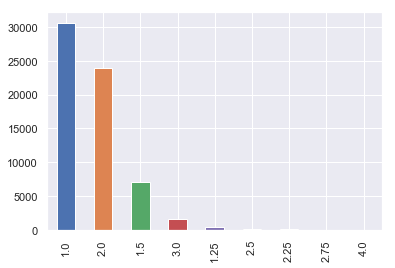

In [55]:
print(df['Story Height'].value_counts())
df['Story Height Custom'].value_counts().plot('bar')
print(df['Story Height Custom'].value_counts())

In [10]:
len(df['Neighborhood'].unique())
#This will be getting pretty granular. We should consider trends among Zones as well.

830

2    16934
1    13569
6    12704
8     9930
7     7337
3     5202
9     2465
4     2053
5     1626
Name: Zone, dtype: int64


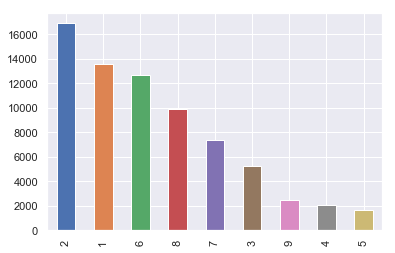

In [11]:
df.Zone.value_counts().plot('bar')
print(df.Zone.value_counts())

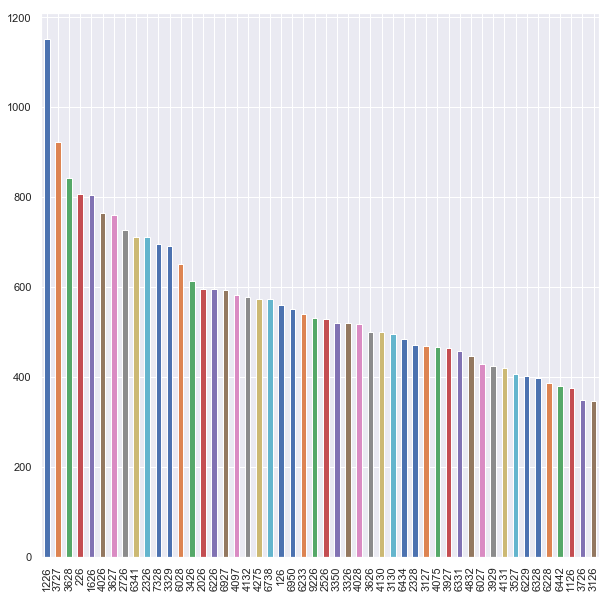

In [12]:
plt.figure(figsize=(10,10))
df.Neighborhood.value_counts()[:50].plot('bar')
plt.show()
#Nice even class distribution

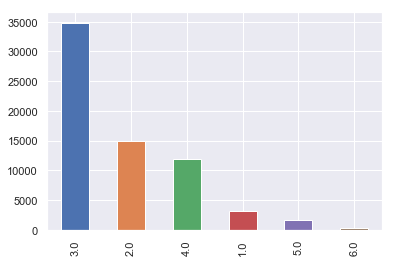

In [13]:
df.Beds.value_counts()[:6].plot('bar')

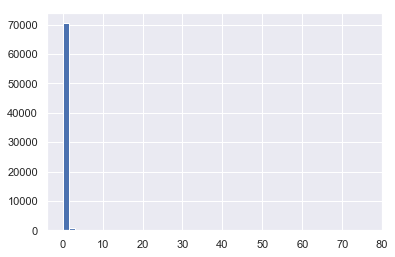

In [14]:
df['Land Area Acres'].hist(bins=50)
#We have some outliers, consider removing
#Important observation: the vsat majority of these units are multifamily (land area of 0)

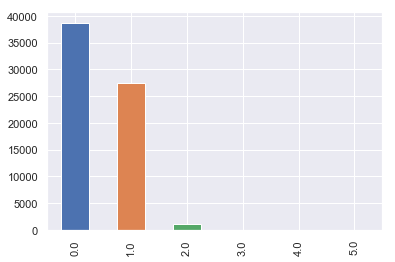

In [9]:
#Add 0.5 to Baths for each "half bath" listed?
#Or not. This is a potential indicator of PPSF
df['Half Bath'].value_counts().plot('bar')

In [8]:
df['Building Condition'].value_counts()
#I think this kind of class imbalance makes it useful for predictive purposes; if anything's different from 'Average' that's significant

Average        65906
Fair             761
Good             271
Poor             119
Very Good         49
Very Poor         34
Dilapidated       25
Excellent         11
Name: Building Condition, dtype: int64

In [49]:
df['Building Grade'].value_counts()
#We cannot use this variable. There is no guide on the Davidson CO site as to what these indicate.

C      41733
B      16256
D       2528
A       2168
X       1121
E        112
TCC       14
SRB       12
SRC        8
OFB        6
OFD        3
TCB        2
ALB        2
IDC        2
TCD        2
SSD        2
AAC        2
OFC        2
TFC        1
SMD        1
SSB        1
ODB        1
IDD        1
ACB        1
SSC        1
Name: Building Grade, dtype: int64

In [50]:
print(df['Building Type'].value_counts())
#Not a useful variable without cleaning.

SINGLE FAM      44847
RESD CONDO      14878
ZERO LOT         1409
HRISE CONDO      1180
RES DUPLEX        901
R1 DUPLEX         268
RH SING FAM       185
RW SING FAM        73
MODULAR HOME       70
RESD TRIPLEX       64
RESD QUADPLX       23
RETAIL/SHPG        21
CHURCH             18
RY SING FAM        17
OFFICE             11
REST/BAR            4
WAREHOUSE           3
HIGHRISE APT        2
APARTMENT           2
RZ SING FAM         2
DAYCARE             1
MARKET              1
HEALTH CLUB         1
LODGE/FRAT'L        1
Name: Building Type, dtype: int64


In [40]:
#Want to create a new column which is the mean sale price per square foot of a parcel in that neighborhood
meanpps=df.groupby('Neighborhood')['PPS'].mean().to_frame().rename(columns={'PPS':'NeighborhoodPPS'})
df=df.merge(meanpps, how='left', left_on = 'Neighborhood',right_index=True)

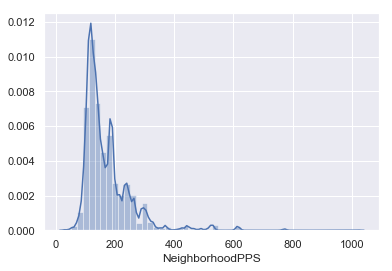

In [41]:
#There are still some outliers to clean.
sns.distplot(df['NeighborhoodPPS'].dropna())

In [56]:
df.nlargest(10,'NeighborhoodPPS')[['NeighborhoodPPS','Zone', 'Neighborhood']]

,NeighborhoodPPS,Zone,Neighborhood
27750,1022.535126,2,9527
31426,1022.535126,2,9527
31427,1022.535126,2,9527
31428,1022.535126,2,9527
31477,1022.535126,2,9527
31478,1022.535126,2,9527
31479,1022.535126,2,9527
31481,1022.535126,2,9527
31546,1022.535126,2,9527
31547,1022.535126,2,9527


In [11]:
df[df['Neighborhood']=='9527']

,Assessment Classification,Assessment Improvement,Assessment Land,Assessment Total,Assessment Year,Baths,Beds,Building Condition,Building Grade,Building Type,...,Improvement Value Improved,Assessment Total Improved,Land Value Improved,Assessment Land Improved,Total Appraisal Value Improved,Land Area Acres,Story Height Custom,Building Type Custom,PPS,NeighborhoodPPS
Most Recent Sale Date,,,,,,,,,,,,,,,,,,,,,
2019-06-13,RES,"$127,825","$89,975","$217,800",2019,4.0,4.0,Average,A,SINGLE FAM,...,511300.0,217800.0,359900.0,89975.0,871200.0,2.44,1.0,SINGLE FAM,209.815951,1022.535126
2019-06-12,RES,$0,"$8,125","$8,125",2019,NaN,NaN,NaN,NaN,NaN,...,0.0,8125.0,32500.0,8125.0,32500.0,1.29,NaN,NaN,NaN,1022.535126
2017-08-31,RES,"$230,275","$133,750","$364,025",2019,5.0,4.0,Good,X,SINGLE FAM,...,921100.0,364025.0,535000.0,133750.0,1456100.0,1.59,2.0,SINGLE FAM,294.880868,1022.535126
2017-02-01,RES,"$169,825","$142,475","$312,300",2019,1.0,2.0,Fair,D,SINGLE FAM,...,679300.0,312300.0,569900.0,142475.0,1249200.0,2.41,1.0,SINGLE FAM,1442.307692,1022.535126
2019-01-25,RES,"$206,025","$255,875","$461,900",2019,1.0,1.0,Average,C,SINGLE FAM,...,824100.0,461900.0,1023500.0,255875.0,1847600.0,4.49,1.0,SINGLE FAM,4072.164948,1022.535126
2017-10-05,RES,"$605,375","$290,175","$895,550",2019,9.0,11.0,Average,X,RH SING FAM,...,2421500.0,895550.0,1160700.0,290175.0,3582200.0,8.12,2.0,RH SING FAM,260.384410,1022.535126
2017-10-05,RES,"$605,375","$290,175","$895,550",2019,9.0,11.0,Average,X,RH SING FAM,...,2421500.0,895550.0,1160700.0,290175.0,3582200.0,8.12,2.0,RH SING FAM,320.341698,1022.535126
2016-08-22,RES,"$91,375","$136,525","$227,900",2019,3.0,3.0,Average,A,SINGLE FAM,...,365500.0,227900.0,546100.0,136525.0,911600.0,2.13,2.0,SINGLE FAM,305.115797,1022.535126
2018-07-02,RES,"$121,750","$91,125","$212,875",2019,4.0,3.0,Average,B,SINGLE FAM,...,487000.0,212875.0,364500.0,91125.0,851500.0,1.17,1.0,SINGLE FAM,171.379970,1022.535126


In [69]:
#Flirting with the idea of Assessment Improvement / Assessment Land ratio as a good predictor of PPS
#Be warned this is only so useful because assessments are done after the property is built and use metrics derived from other data
#However when averaged across the neighborhood it could show promise
#Hypothesis: A neighborhood with low assessment ratio but high population density will get gentrified
df['Assessment Improvement'] = dolcomma(df['Assessment Improvement'])
df['Assessment Land'] = dolcomma(df['Assessment Land'])
#Normalize it
df['Assessment Ratio'] = df['Assessment Improvement'] / (df['Assessment Land'] + df['Assessment Improvement'])

In [71]:
df['Assessment Ratio']

0        0.812778
1        0.809886
2        0.699925
3        0.699925
4        0.478043
7        0.715536
8        0.699074
9        0.752664
10       0.785818
11       0.785818
12       0.692373
13       0.000000
14       0.782681
15       0.694549
16       0.688995
17       0.792928
18       0.681840
19       0.736522
20       0.691065
21       0.691065
22       0.744396
23       0.671883
24       0.787651
25       0.735987
26       0.816540
27       0.798829
28       0.660149
29       0.782062
30       0.812314
31       0.796026
           ...   
71789    0.455338
71790    0.455338
71791    0.455338
71792    0.463519
71793    0.458874
71794    0.458874
71795    0.463519
71796    0.455338
71797    0.415888
71798    0.415888
71799    0.463519
71800    0.458874
71801    0.458874
71802    0.463519
71803    0.455338
71804    0.914884
71805    0.914884
71806    0.914884
71807    0.914884
71808    0.925244
71810    0.635317
71811    0.635317
71812    0.635317
71813    0.635317
71814    0

In [72]:
meanpps=df.groupby('Neighborhood')['Assessment Ratio'].mean().to_frame().rename(columns={'Assessment Ratio':'NeighborhoodAR'})
df=df.merge(meanpps, how='left', left_on = 'Neighborhood',right_index=True)

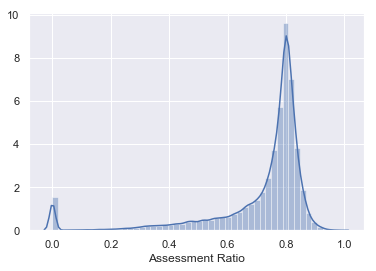

In [74]:
sns.distplot(df['Assessment Ratio'].dropna())

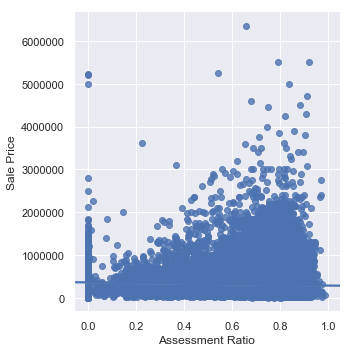

In [76]:
sns.lmplot(x='Assessment Ratio', y = 'Sale Price', data = df)
#Need to drop 

In [1]:
ratioprice= pd.DataFrame(df[['Assessment Ratio', 'Sale Price', 'Year Built']])

ratioprice.corr()
#Almost no correlation whatsoever between ratio and price

NameError: name 'pd' is not defined

In [13]:
meanpps=df.groupby('Neighborhood')['PPS'].mean().to_frame().rename(columns={'PPS':'NeighborhoodPPS'})

ValueError: cannot convert float NaN to integer

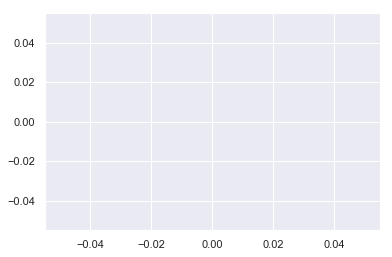

In [15]:
sns.distplot(df.NeighborhoodPPS)